In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time
from torch.autograd import Variable

In [2]:
LR = 0.003
BATCH_SIZE = 64
EPOCH = 250

In [3]:
df = pd.read_csv('./ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
from sklearn import model_selection as ms
train_set, test_set = ms.train_test_split(df, test_size=0.25)
len(train_set), len(test_set)

(75627, 25209)

In [5]:
training_set = np.array(train_set, dtype = 'int')
testing_set = np.array(test_set, dtype = 'int')

In [6]:
num_users = df.userId.unique().shape[0]
num_items = df.movieId.unique().shape[0]
num_users, num_items

(610, 9724)

In [7]:
movie_movieId = df.movieId.unique().tolist()
movie_movieId.sort()
d = dict()
for i in range(0, len(movie_movieId)):
    d[movie_movieId[i]] = i

In [8]:
def user_item_matrix(data):
    ratings = np.zeros((num_users, num_items))
    for row in data.itertuples():
        ratings[row[1]-1, d[row[2]]] = row[3]
    return ratings

In [9]:
ratings = user_item_matrix(df)
train = user_item_matrix(train_set)
test = user_item_matrix(test_set)

In [10]:
train = torch.FloatTensor(train)
input = Variable(train).unsqueeze(0)
input.shape

torch.Size([1, 610, 9724])

In [11]:
train = torch.FloatTensor(train)
test = torch.FloatTensor(test)
input = Variable(train).unsqueeze(0)
target = input
torch_dataset = Data.TensorDataset(input, target)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

In [12]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_items, 500)
        self.fc2 = nn.Linear(500, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 50)
        self.fc5 = nn.Linear(50, 500)
        self.fc6 = nn.Linear(500, num_items)
        self.activation = nn.Sigmoid()
        self.activation_t = nn.Tanh()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation_t(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.fc6(x)
        return x

In [13]:
net = Net()
loss_func = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=LR, betas=(0.9, 0.99))

In [14]:
loss_his = []
st = time.time()
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(loader): 
        # for each training step
        output = net(b_x)  
        output[target == 0] = 0
        # get output for every net
        loss = loss_func(output, b_y)  # compute loss for every net
        opt.zero_grad()                # clear gradients for next train
        loss.backward()                # backpropagation, compute gradients
        opt.step()                     # apply gradients
        loss_his.append(loss.data.numpy())     # loss recoder
        print('Epoch: ', epoch, '| Step: ', step, '| train loss: ', loss.data.numpy())

print('Runtime: ' + str(time.time()-st) + 'seconds')

Epoch:  0 | Step:  0 | train loss:  0.17148888
Epoch:  1 | Step:  0 | train loss:  0.11271715
Epoch:  2 | Step:  0 | train loss:  0.0663337
Epoch:  3 | Step:  0 | train loss:  0.033507507
Epoch:  4 | Step:  0 | train loss:  0.015951904
Epoch:  5 | Step:  0 | train loss:  0.013501621
Epoch:  6 | Step:  0 | train loss:  0.021626445
Epoch:  7 | Step:  0 | train loss:  0.031184664
Epoch:  8 | Step:  0 | train loss:  0.035927992
Epoch:  9 | Step:  0 | train loss:  0.034919977
Epoch:  10 | Step:  0 | train loss:  0.030004762
Epoch:  11 | Step:  0 | train loss:  0.023699662
Epoch:  12 | Step:  0 | train loss:  0.01803793
Epoch:  13 | Step:  0 | train loss:  0.014153437
Epoch:  14 | Step:  0 | train loss:  0.012317966
Epoch:  15 | Step:  0 | train loss:  0.012191646
Epoch:  16 | Step:  0 | train loss:  0.013129096
Epoch:  17 | Step:  0 | train loss:  0.014441997
Epoch:  18 | Step:  0 | train loss:  0.015573674
Epoch:  19 | Step:  0 | train loss:  0.016179722
Epoch:  20 | Step:  0 | train loss:

Epoch:  167 | Step:  0 | train loss:  0.00957091
Epoch:  168 | Step:  0 | train loss:  0.009570809
Epoch:  169 | Step:  0 | train loss:  0.00957069
Epoch:  170 | Step:  0 | train loss:  0.009570545
Epoch:  171 | Step:  0 | train loss:  0.009570365
Epoch:  172 | Step:  0 | train loss:  0.009570151
Epoch:  173 | Step:  0 | train loss:  0.009569919
Epoch:  174 | Step:  0 | train loss:  0.009569702
Epoch:  175 | Step:  0 | train loss:  0.009569507
Epoch:  176 | Step:  0 | train loss:  0.009569306
Epoch:  177 | Step:  0 | train loss:  0.009569061
Epoch:  178 | Step:  0 | train loss:  0.0095687425
Epoch:  179 | Step:  0 | train loss:  0.009568324
Epoch:  180 | Step:  0 | train loss:  0.009567789
Epoch:  181 | Step:  0 | train loss:  0.009567177
Epoch:  182 | Step:  0 | train loss:  0.009566609
Epoch:  183 | Step:  0 | train loss:  0.009566106
Epoch:  184 | Step:  0 | train loss:  0.009565519
Epoch:  185 | Step:  0 | train loss:  0.00956474
Epoch:  186 | Step:  0 | train loss:  0.009563748
Ep

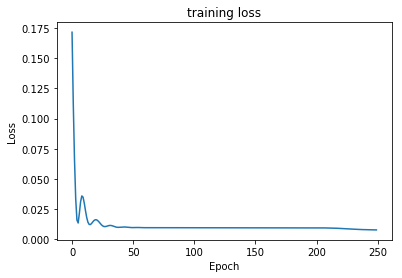

In [15]:
plt.plot(range(EPOCH), loss_his)
plt.title('training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
test_var = Variable(test).unsqueeze(0)
out = net(test_var)
out

tensor([[[ 4.2028e+00,  3.8200e+00,  3.6546e+00,  ..., -1.9895e-01,
          -5.2145e-03, -7.2796e-02],
         [ 3.3983e+00,  2.9927e+00,  2.8902e+00,  ..., -1.4101e-01,
           1.6666e-02, -7.0990e-02],
         [ 3.4957e+00,  3.0929e+00,  2.9818e+00,  ..., -1.4780e-01,
           1.4445e-02, -7.1610e-02],
         ...,
         [ 3.9680e+00,  3.5788e+00,  3.4305e+00,  ..., -1.8193e-01,
           1.5661e-03, -7.2489e-02],
         [ 3.0447e+00,  2.6312e+00,  2.5615e+00,  ..., -1.1732e-01,
           2.4653e-02, -6.7558e-02],
         [ 3.6230e+00,  3.2237e+00,  3.1028e+00,  ..., -1.5687e-01,
           1.0428e-02, -7.1226e-02]]], grad_fn=<AddBackward0>)

In [17]:
out = out.detach().numpy()[0,:,:]

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_mse(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)
def get_mae(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)

test = user_item_matrix(test_set)
print('Autoencoder RMSE: ' + str(math.sqrt(get_mse(out, test))))
print('Autoencoder MAE: ' + str(get_mae(out, test)))

Autoencoder RMSE: 1.2137675986770897
Autoencoder MAE: 1.4732317835983486
